## Exploration

It is well established that home teams have an advantage. Commentators often note this and sometimes attribute players' good/bad performances to where they are playing. Many factors are attributed to this, such as stress to away teams due to travel, psychological advantages for home teams due to fans present, and significantly far apart teams. Environmental factors such as weather can also benefit teams playing at their ground. A study conducted 2007 revealed bias in referees in favour of home teams [(BBC, 2007)](http://news.bbc.co.uk/1/hi/england/6629397.stm).

I aim to explore how teams have an advantage and how winning teams take advantage of their home games.
The data for premier league matches will be obtained from [Kaggle](https://www.kaggle.com/) and [Eurosport](https://www.eurosport.com). I will compare the statistics for matches for games played home vs away (e.g., home team shots vs away team shots).

## Imports and setup

The libraries I need for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

## Premier League data


### Kaggle Dataset

Kaggle allows anyone to upload a dataset so I took great care when choosing a dataset. I ensured it was up to date, and compared the data to the data sources provided in the description of the dataset. 

The data contains records of football matches in the premier league from the 1993-94 season until the 2020-2021 season https://www.kaggle.com/irkaal/english-premier-league-results. The data was easy to use format (CSV), including many exciting and relevant features (listed below). The creator of the dataset collected the statistics from xscores, BBC, ESPN Soccer. To ensure that the data was reliable, I compared the data from the dataset to the data provided on the sites:

- xscores https://www.xscores.com/soccer/england/premier-league
- BBC https://www.bbc.com/sport/football/premier-league/scores-fixtures
- ESPN Soccer https://www.espn.co.uk/football/scoreboard/_/league/eng.1/

The data is also in the public domain, and the dataset has a [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) license. After looking through the data manually, I found that many of the relevant columns necessary for good analysis were not recorded until the 200-2001 season starting on 19th August 2020. The omission of the records with null data still provided records of almost 20 years of premier league matches.

Most of the columns used acronyms; there is a table that translates these into plain English in the data site description. I have recreated it below for ease of use.

I imported the CSV data into a pandas DataFrame, and dropped the null values.

### Data columns and types

I obtained descriptions of the columns have from the source. These allow me to infer the data type of some data and check for any errors. For example, with FTR (Full Time Result), there are three possibilities, H (Home Win), D (Draw), A (Away Win) which means it is a categorical type. I have also converted all the numeric times to unsigned 8-bit integers as all the values are very small and positive. 

|Column | Description| Type |
|-------|------------| ---- |
|Season | Match Season|Categorical|
|DateTime | Match Date and Time (yyyy-mm-dd hh:mm:ss)|DateTime|
|HomeTeam | Home Team|Categorical|
|AwayTeam | Away Team|Categorical|
|FTHG | Full Time Home Team Goals| Integer |
|FTAG | Full Time Away Team Goals| Integer |
|FTR | Full Time Result (H=Home Win, D=Draw, A=Away Win)| Categorical |
|HTHG | Half Time Home Team Goals| Integer |
|HTAG | Half Time Away Team Goals| Integer |
|HTR | Half Time Result (H=Home Win, D=Draw, A=Away Win)|Categorical |
|Referee | Match Referee|Categorical |
|HS | Home Team Shots| Integer |
|AS | Away Team Shots| Integer |
|HST | Home Team Shots on Target| Integer |
|AST | Away Team Shots on Target| Integer |
|HC | Home Team Corners| Integer |
|AC | Away Team Corners| Integer |
|HF | Home Team Fouls Committed| Integer |
|AF | Away Team Fouls Committed| Integer |
|HY | Home Team Yellow Cards| Integer |
|AY | Away Team Yellow Cards| Integer |
|HR | Home Team Red Cards| Integer |
|AR | Away Team Red Cards| Integer |

### Eurosport

I used [Eurosport](https://www.eurosport.com/) to scrape a list of premier league winners in the past.

In [2]:
URL = 'https://www.eurosport.com/football/premier-league/palmares.shtml'
page = urlopen(URL)
html_bytes = page.read()
html = html_bytes.decode('utf-8')
parsed = BeautifulSoup(html, 'html.parser')

In [3]:
winners = {}
winner_rows = parsed \
    .find('div', class_='table-generic--winners') \
    .find_all('div', class_='table-generic__row')

In [4]:
# need to map names to match kaggle dataset
name_mapper = {
    'Manchester United': 'Man United',
    'Manchester City': 'Man City',
    'Leicester City': 'Leicester',
    'Chelsea': 'Chelsea',
    'Arsenal': 'Arsenal',
    'Liverpool': 'Liverpool'
}

for row in winner_rows:
    year = row \
        .find('div', class_='table-generic__item--year') \
        .get_text()
    if year == '1999-2000':
        break
    season = re.sub(r'-\d{2}', '-', year)
    team = row \
        .find('a', class_='table-generic__item--winner') \
        .get_text()
    winners[season] = name_mapper[team]

# winners

{'2019-20': 'Liverpool',
 '2018-19': 'Man City',
 '2017-18': 'Man City',
 '2016-17': 'Chelsea',
 '2015-16': 'Leicester',
 '2014-15': 'Chelsea',
 '2013-14': 'Man City',
 '2012-13': 'Man United',
 '2011-12': 'Man City',
 '2010-11': 'Man United',
 '2009-10': 'Chelsea',
 '2008-09': 'Man United',
 '2007-08': 'Man United',
 '2006-07': 'Man United',
 '2005-06': 'Chelsea',
 '2004-05': 'Chelsea',
 '2003-04': 'Arsenal',
 '2002-03': 'Man United',
 '2001-02': 'Arsenal',
 '2000-01': 'Man United'}

In [5]:
import pandas as pd
import numpy as np

dtypes = {
    # Category types
    'Season': 'category',
    'HomeTeam': 'category',
    'AwayTeam': 'category',
    'FTR': 'category',
    'HTR': 'category',
    'Referee': 'category',
    # integer types
    'FTHG': 'uint8',
    'FTAG': 'uint8',
    'HTHG': 'uint8',
    'HTAG': 'uint8',
    'HS': 'uint8',
    'AS': 'uint8',
    'HST': 'uint8',
    'AST': 'uint8',
    'HC': 'uint8',
    'AC': 'uint8',
    'HF': 'uint8',
    'AF': 'uint8',
    'HY': 'uint8',
    'AY': 'uint8',
    'HR': 'uint8',
    'AR': 'uint8',
    'DateTime': 'datetime64'
}
df = pd.read_csv('data.csv')
df.dropna(inplace=True)
df = df.astype(dtypes)

### Simple checks

In this section, I will do some simple checks to check for errors in the data. 

From https://www.premierleague.com/clubs, it can be seen a total of 49 cubs have played in premier league; 43 clubs have participated since the 2000-2001 season.

In [6]:
category_len = lambda category: len(df[category].unique())
assert category_len('HomeTeam') == 43
assert category_len('AwayTeam') == 43
assert category_len('HTR') == 3
assert category_len('FTR') == 3
assert category_len('Season') == 21

To ensure that the goal data is intact, I am checking that highest number of goals matches that statistics provided on the premier league website. https://www.premierleague.com/stats/top/clubs/goals

| Season | Top scoring team | Goals |
|--------|------------------|-------|
| 2007-08 | Manchester United | 80  |
| 2012-13 | Manchester United | 86  |
| 2017-18 | Manchester City   | 106 |
| 2018-19 | Manchester City   | 95  |

In [7]:
def goal_count(season, team):
    season_group = df.groupby('Season').get_group(season)
    home_goals = season_group[season_group['HomeTeam'] == team]['FTHG'].sum()
    away_goals = season_group[season_group['AwayTeam'] == team]['FTAG'].sum()
    return home_goals + away_goals

assert goal_count('2007-08', 'Man United') == 80
assert goal_count('2012-13', 'Man United') == 86
assert goal_count('2017-18', 'Man City') == 106
assert goal_count('2018-19', 'Man City') == 95

## Data setup

### Specific case

Before analysing the entire dataset, I will do the setup of a single team. This will allow me to prepare for any challenges that I will face and reduce the potential for hard to find bugs. 

I will use Manchester City to do the specific case setup as it has been the top scorer in recent years

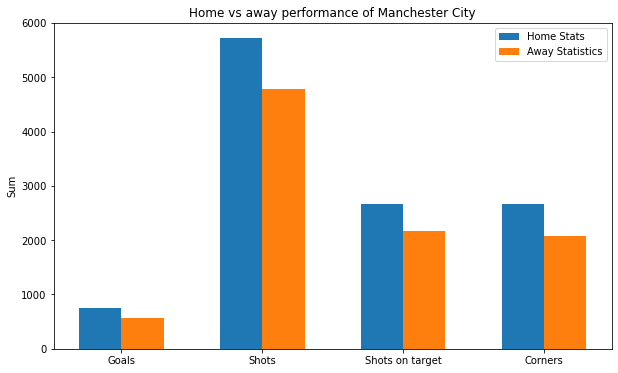

In [8]:
# labels for data visualisation
labels = ['Goals', 'Shots', 'Shots on target', 'Corners']
# gather statistics for home games
df_mancity_home = df.groupby('HomeTeam').get_group('Man City')
home_sum = lambda feature: df_mancity_home[feature].sum()
home_statistics = np.array([
    home_sum('FTHG'), # goals
    home_sum('HS'),   # shots
    home_sum('HST'),  # shots on target
    home_sum('HC')    # corners
])
# gather statistics for away games
df_mancity_away = df.groupby('AwayTeam').get_group('Man City')
away_sum = lambda feature: df_mancity_away[feature].sum()
away_statistics = np.array([
    away_sum('FTAG'), # goals
    away_sum('AS'),   # shots
    away_sum('AST'),  # shots on target
    away_sum('AC')    # corners
])
# plot both in a bar chart
xs = np.arange(len(labels))
bar_width = 0.3
figure, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Sum')
ax.set_title('Home vs away performance of Manchester City')
ax.bar(xs - bar_width/2, home_statistics, bar_width, label='Home Stats')
ax.bar(xs + bar_width/2, away_statistics, bar_width, label='Away Statistics')
ax.set_xticks(xs)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

As we can see, overall Manchester City seems to have a clear advantage across all measures available in the dataset. However, the scale of each feature is drastically different from one another. Therefore, I have decided to normalise the data between 0 and 1 to compare each statistic effectively.

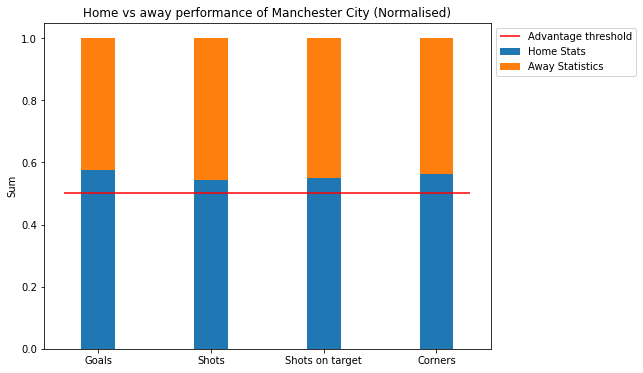

In [9]:
home_norm = (home_statistics)/(home_statistics + away_statistics)
away_norm = (away_statistics)/(home_statistics + away_statistics)

figure, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel('Sum')
ax.set_title('Home vs away performance of Manchester City (Normalised)')
ax.bar(xs, home_norm, bar_width, label='Home Stats')
ax.bar(xs, away_norm, bar_width, label='Away Statistics', bottom=home_norm)
# 0.5 line to show diference easily
ax.hlines(0.5, xs.min() - bar_width, xs.max() + bar_width, colors='r', label='Advantage threshold')
ax.set_xticks(xs)
ax.set_xticklabels(labels)
# move legend out of plot
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### General case

In the general case, I will normalise the data for all the relevant fields and group the data by home and away teams by each season. I will use this to create visualisations then and create statistics.

What these values represent is how much better teams perform when playing home vs when playing away. A value close to 0.5 means that the team performs the same regardless of where they play. It would be interesting to see whether teams with a value closer to 0.5 perform better than teams affected by the environment more.

#### Data structure

I will use a dictionary to store all the DataFrames by year, where the **key** will be the *season* and the **value** will be a *DataFrame* holding the statistics for each team.

In [10]:
season_data_normalised = {}
season_data = {}

home_features = ['FTHG', 'HTHG', 'HS', 'HST', 'HC', 'HF', 'HY', 'HR']
away_features = ['FTAG', 'HTAG', 'AS', 'AST', 'AC', 'AF', 'AY', 'AR']
seasons = df['Season'].unique()[:-1]

for season in seasons:
    # for every season group the data by home team and away team
    df_season = df[df['Season'] == season]
    home_group = df_season.groupby('HomeTeam').sum()
    home_group_results = pd.crosstab(df_season['HomeTeam'], df_season['FTR'])
    away_group = df_season.groupby('AwayTeam').sum()
    away_group_results = pd.crosstab(df_season['AwayTeam'], df_season['FTR'])
    
    raw_data = {}
    normalised_data = {}
    
    for i in range(len(home_features)):
        # normalise the data by calculating the proportion of scores for home vs away
        home_feature = home_group[home_features[i]]
        away_feature = away_group[away_features[i]]

        raw_data[home_features[i]] = home_feature
        raw_data[away_features[i]] = away_feature
        
        normalised_data[home_features[i]] = home_feature / (home_feature + away_feature)
        normalised_data[away_features[i]] = away_feature / (home_feature + away_feature)

     # As red cards/yellow cards are rare 
     # ensure NaN values are stored as 0 befire droppping na rows

    
    raw_frame = pd.DataFrame(raw_data);
    #add wins at home/away to the raw frame
    raw_frame.insert(
        len(raw_frame.columns),
        column='HW',
        value=home_group_results['H']
    )

    raw_frame.insert(
        len(raw_frame.columns),
        column='HD',
        value=home_group_results['D']
    )

    raw_frame.insert(
        len(raw_frame.columns),
        column='AW',
        value=away_group_results['A']
    )
    raw_frame.insert(
        len(raw_frame.columns),
        column='AD',
        value=away_group_results['D']
    )
    
    raw_frame.dropna(inplace=True)
    
    card_features = {'HY': 0, 'HR': 0, 'AY': 0, 'AR': 0}
    
    normalised_frame = pd.DataFrame(normalised_data) \
        .fillna(card_features) \
        .dropna()
    
    season_data[season] = raw_frame
    season_data_normalised[season] = normalised_frame
    


In [11]:
season_data[season]

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HW,HD,AW,AD
Arsenal,36.0,20.0,21.0,7.0,231.0,179.0,91.0,60.0,128.0,103.0,221.0,200.0,42.0,44.0,2.0,3.0,10.0,6.0,4.0,8.0
Aston Villa,22.0,19.0,11.0,8.0,249.0,210.0,80.0,70.0,111.0,89.0,231.0,220.0,34.0,34.0,0.0,1.0,7.0,3.0,2.0,5.0
Bournemouth,22.0,18.0,9.0,11.0,199.0,190.0,61.0,60.0,102.0,92.0,172.0,197.0,36.0,37.0,2.0,1.0,5.0,6.0,4.0,1.0
Brighton,20.0,19.0,8.0,8.0,236.0,225.0,68.0,74.0,103.0,75.0,186.0,199.0,27.0,29.0,1.0,1.0,5.0,7.0,4.0,7.0
Burnley,24.0,19.0,7.0,7.0,220.0,168.0,81.0,53.0,95.0,76.0,211.0,201.0,30.0,37.0,0.0,0.0,8.0,4.0,7.0,5.0
Chelsea,30.0,39.0,16.0,20.0,332.0,293.0,121.0,102.0,137.0,110.0,176.0,210.0,30.0,30.0,0.0,0.0,11.0,3.0,9.0,3.0
Crystal Palace,15.0,16.0,4.0,6.0,231.0,145.0,68.0,52.0,111.0,66.0,207.0,218.0,34.0,27.0,1.0,1.0,6.0,5.0,5.0,5.0
Everton,24.0,20.0,14.0,13.0,252.0,218.0,93.0,69.0,108.0,95.0,220.0,252.0,32.0,38.0,0.0,3.0,8.0,7.0,5.0,3.0
Leicester,35.0,32.0,10.0,14.0,262.0,275.0,88.0,102.0,118.0,104.0,206.0,212.0,19.0,22.0,1.0,2.0,11.0,4.0,7.0,4.0
Liverpool,52.0,33.0,29.0,15.0,314.0,276.0,129.0,102.0,144.0,114.0,156.0,175.0,13.0,25.0,1.0,0.0,18.0,1.0,14.0,2.0


#### Simple check 

I am going to ensure that each season has 20 teams.

In [12]:
for season in seasons:
    assert len(season_data[season]) == 20, "Season {} does not have 20 players for raw data".format(season)
    assert len(season_data_normalised[season]) == 20, "Season {} does not have 20 players for normalised data".format(season)

## Data analysis

### Visual summary

I will provide a brief visual summary of the relevant data to see any patterns in the data. Here I will plot several bar charts with regards to home games. If the percentage of teams who benefit from playing at home exceeds 50%, the colour will be orange. This is because it will highlight which years the *majority* of teams had an advantage. The bar's colour would be green if 100% of the teams had the advantage for the particular statistic for the given year. The rest will be blue.

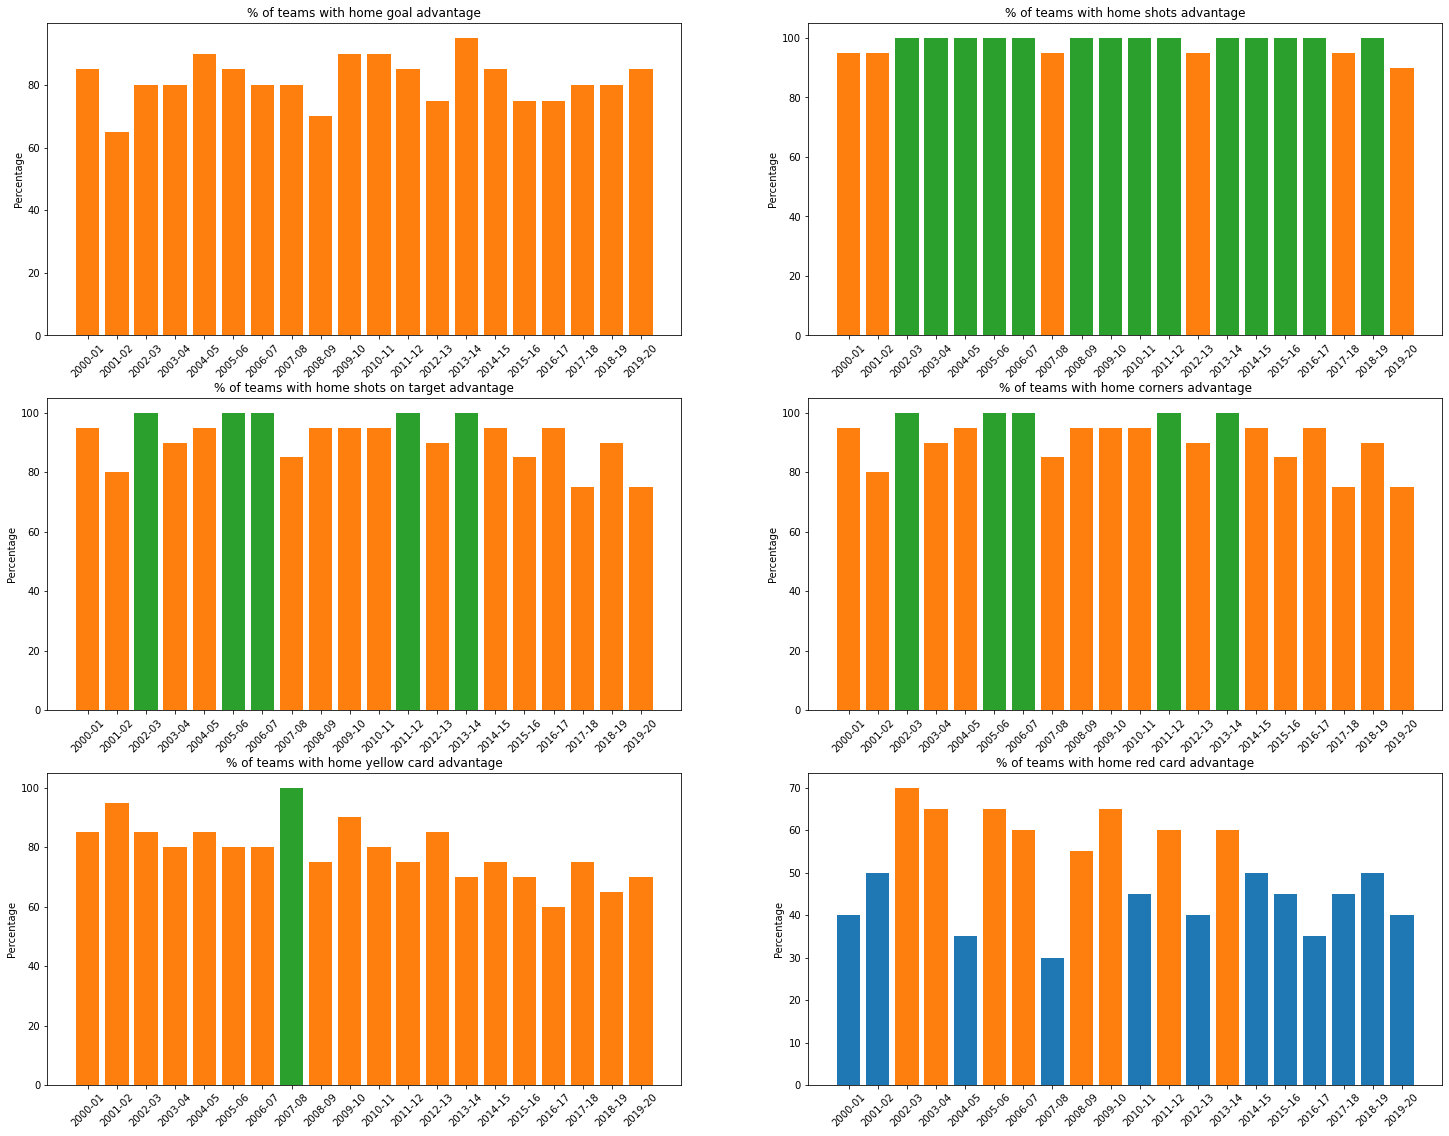

In [122]:
home_advantage_goal_percents = []
home_advantage_shots_percents = []
home_advantage_shots_target_percents = []
home_advantage_corners_percents = []
home_advantage_yellow_cards_percents = []
home_advantage_red_cards_percents = []

for season in seasons:
    current_season = season_data_normalised[season]
    # mulitply by 5 to get percentage (100/20)
    advantage_percent = lambda feature: (current_season[feature] > 0.5).sum() * 5
    home_advantage_goal_percents.append(advantage_percent('FTHG'))
    home_advantage_shots_percents.append(advantage_percent('HS'))
    home_advantage_shots_target_percents.append(advantage_percent('HST'))
    home_advantage_corners_percents.append(advantage_percent('HC'))
    home_advantage_yellow_cards_percents.append(advantage_percent('AY'))
    home_advantage_red_cards_percents.append(advantage_percent('AR'))

figure, axs = plt.subplots(3,2, figsize=(25, 10))
figure.subplots_adjust(top=1.6)

def get_bar_colors(percents):
    colors = []
    for percent in percents:
        if percent <= 50:
            colors.append('C0')
        elif percent < 100:
            colors.append('C1')
        else:
            colors.append('C2')
    return colors

axs[0, 0].set_title('% of teams with home goal advantage')
axs[0, 0].bar(seasons, home_advantage_goal_percents, color=get_bar_colors(home_advantage_goal_percents))
axs[0, 1].set_title('% of teams with home shots advantage')
axs[0, 1].bar(seasons, home_advantage_shots_percents, color=get_bar_colors(home_advantage_shots_percents))
axs[1, 0].set_title('% of teams with home shots on target advantage')
axs[1, 0].bar(seasons, home_advantage_shots_target_percents, color=get_bar_colors(home_advantage_shots_target_percents))
axs[1, 1].set_title('% of teams with home corners advantage')
axs[1, 1].bar(seasons, home_advantage_shots_target_percents, color=get_bar_colors(home_advantage_shots_target_percents))
axs[2, 0].set_title('% of teams with home yellow card advantage')
axs[2, 0].bar(seasons, home_advantage_yellow_cards_percents, color=get_bar_colors(home_advantage_yellow_cards_percents))
axs[2, 1].set_title('% of teams with home red card advantage')
axs[2, 1].bar(seasons, home_advantage_red_cards_percents, color=get_bar_colors(home_advantage_red_cards_percents))

# rotate tick labels so that it is easier to read
for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_ylabel('Percentage')

plt.show()

From the charts, it can be seen most teams have the advantage of playing at home. Most teams that play at their home ground score more goals. Most impressive is the number of shots the team takes when playing on their home team. For many years 100% of the teams have more shots when playing at home. Most of the teams also seem to get corner kicks in their favour when playing at home.

Looking at the yellow and red cards' differences, teams receive less yellow cards when playing in their stadiums. However, the percentage of teams getting a yellow card advantage seems to be falling.

### Best and worst

In this section I create a table for teams that perform better than others at home, the team that peforms the worst at home and the team that performs most consistently regardless of where they play. The table will also include the winners for the years to see if they fall under any of these categories.

For the best and worse scores the full time home goals, home shots and home shots on target will be summed up and the highest/lowest for the team will be chosen.

For the most conistent team, I will calculate the sum of the absolute error for each feature. The team will the lowest error will be the one which has the least impact for the stadiums they play in.


In [124]:
best_worst_comparators = ['FTHG', 'HS', 'HST']

best_team_home = []
worst_team_home = []
consistent_team = []
winning_team = []

for season in seasons:
    current_season = season_data_normalised[season]
    # BWS = Best worst sum
    current_season['BWS'] = current_season.loc[:, best_worst_comparators].sum(axis=1)
    best_team_home.append(current_season['BWS'].idxmax())
    worst_team_home.append(current_season['BWS'].idxmin())
    # CS = Consistency score
    consistent_team.append(
        current_season.apply(
            # absolute average of the comparators
            lambda df: (abs((df['FTHG'] - 0.5)) + abs((df['HS'] - 0.5))  + abs((df['HST'] - 0.5))) / 3,
            axis=1
        ).sort_values().idxmin()
    )
    winning_team.append(winners[season])
        
best_worst = pd.DataFrame({
    'Best Home Performance': best_team_home,
    'Worst Home Performance': worst_team_home,
    'Consistence Performance': consistent_team,
    'Winner': winning_team
}, index=seasons)

display(best_worst)

,Best Home Performance,Worst Home Performance,Consistence Performance,Winner
2000-01,Arsenal,Coventry,Man City,Man United
2001-02,West Ham,Aston Villa,Southampton,Arsenal
2002-03,Bolton,Leeds,West Ham,Man United
2003-04,Portsmouth,Chelsea,Chelsea,Arsenal
2004-05,Tottenham,West Brom,Man City,Chelsea
2005-06,Bolton,Aston Villa,Aston Villa,Chelsea
2006-07,Middlesbrough,Man City,Aston Villa,Man United
2007-08,Tottenham,Aston Villa,Arsenal,Man United
2008-09,Portsmouth,Hull,Hull,Man United
2009-10,Portsmouth,Birmingham,Birmingham,Chelsea


From the table, we can see that the teams that perform the worst at home relative to other teams also seem to be the most consistent in some years. This indicates that teams that take good advantage of home games may do better overall.

### Shots vs Goals vs Wins

We have seen the majority of teams playing at home get more shots, more shots on target and more goals compared to when they play away. Here I will compare the proportion of shots that are scored at home become shots on target, and the number of shots on target become goals in comparison to away.

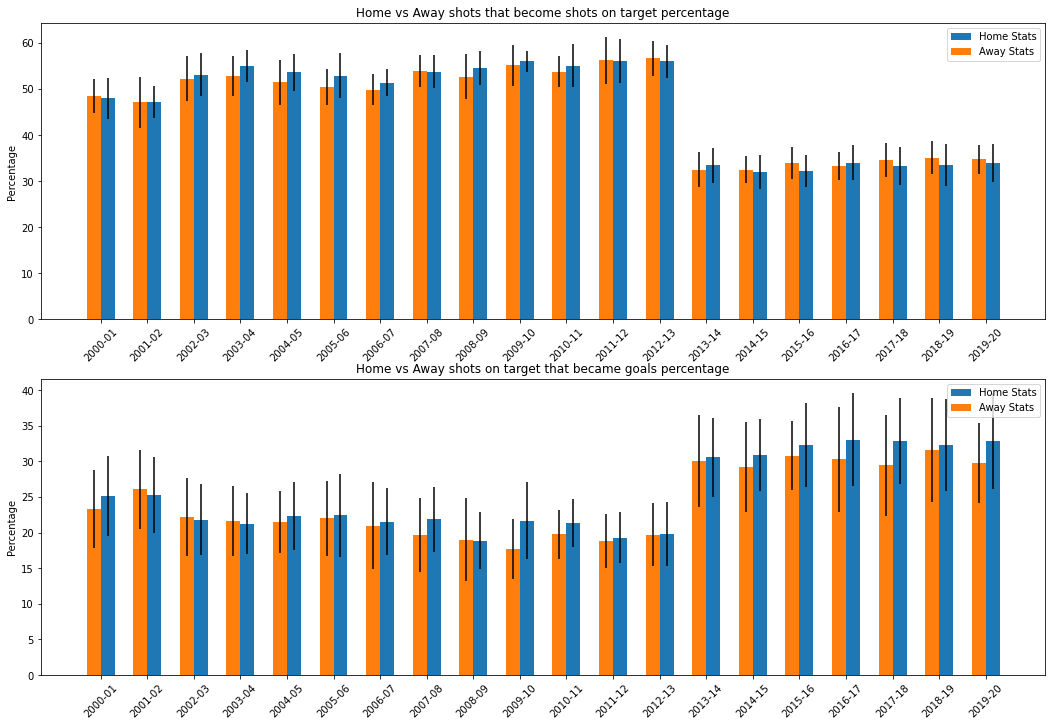

In [18]:
home_shots_on_target_percentage = []
home_shots_on_target_percentage_stdev = []
home_goals_percentage = []
home_goals_percentage_stdev = []

away_shots_on_target_percentage = []
away_shots_on_target_percentage_stdev = []
away_goals_percentage = []
away_goals_percentage_stdev = []

for season in seasons:
    current_season = season_data[season]
    home_shots_on_target = (100 * current_season['HST'] / current_season['HS'])
    home_goals = (100 * current_season['FTHG'] / current_season['HST'])
    
    away_shots_on_target = (100 * current_season['AST'] / current_season['AS'])
    away_goals = (100 * current_season['FTAG'] / current_season['AST'])
    
    home_shots_on_target_percentage.append(home_shots_on_target.mean())
    home_shots_on_target_percentage_stdev.append(home_shots_on_target.std())
    
    home_goals_percentage.append(home_goals.mean())
    home_goals_percentage_stdev.append(home_goals.std())
    
    away_shots_on_target_percentage.append(away_shots_on_target.mean())
    away_shots_on_target_percentage_stdev.append(away_shots_on_target.std())
    
    away_goals_percentage.append(away_goals.mean())
    away_goals_percentage_stdev.append(away_goals.std())

xs = np.arange(len(seasons))
bar_width = 0.3
fig, axs = plt.subplots(2, figsize=(18, 12))

axs[0].set_title('Home vs Away shots that become shots on target percentage')
axs[0].bar(xs + bar_width/2, home_shots_on_target_percentage, bar_width, label='Home Stats', yerr=home_shots_on_target_percentage_stdev)
axs[0].bar(xs -  bar_width/2, away_shots_on_target_percentage, bar_width, label='Away Stats', yerr=away_shots_on_target_percentage_stdev)
axs[0].set_xticks(xs)
axs[0].set_xticklabels(seasons)

axs[1].set_title('Home vs Away shots on target that became goals percentage')
axs[1].bar(xs + bar_width/2, home_goals_percentage, bar_width, label='Home Stats', yerr=home_goals_percentage_stdev)
axs[1].bar(xs -  bar_width/2, away_goals_percentage, bar_width, label='Away Stats', yerr=away_goals_percentage_stdev)
axs[1].set_xticks(xs)
axs[1].set_xticklabels(seasons)

for ax in axs:
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_ylabel('Percentage')
    ax.legend()

plt.show()

The peroportion of shots that become shorts on target is significant higher than the proportion of shots on target that become goals. it has been like this until the 2012-13 season. From then the proprition of goalss that become shots on target deaceased a lot and the number of shots on target that become goals increased. 

## Advanced method

### Clustering

It would be exciting to use unsupervised learning on the data to see which teams have a similar style. I will be looking at the 2019-20 season and cluster using sklearn KMeans.

#### Exploration

In [125]:
latest_season = season_data['2019-20']

# pd.plotting.scatter_matrix(latest_season, figsize=(40, 40));

The features that were chosen are a combination of home wins and full-time home goals.
The scatter plot for the data is as follows

Text(0, 0.5, 'Full time home goals')

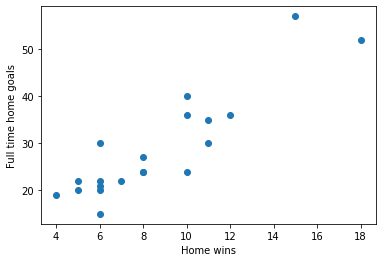

In [126]:
plt.scatter(latest_season['HW'], latest_season['FTHG'])
plt.xlabel('Home wins')
plt.ylabel('Full time home goals')

There seem to be three distict clusters, which is what will be used as the k value for k-means

### Performance of wins vs full time teams

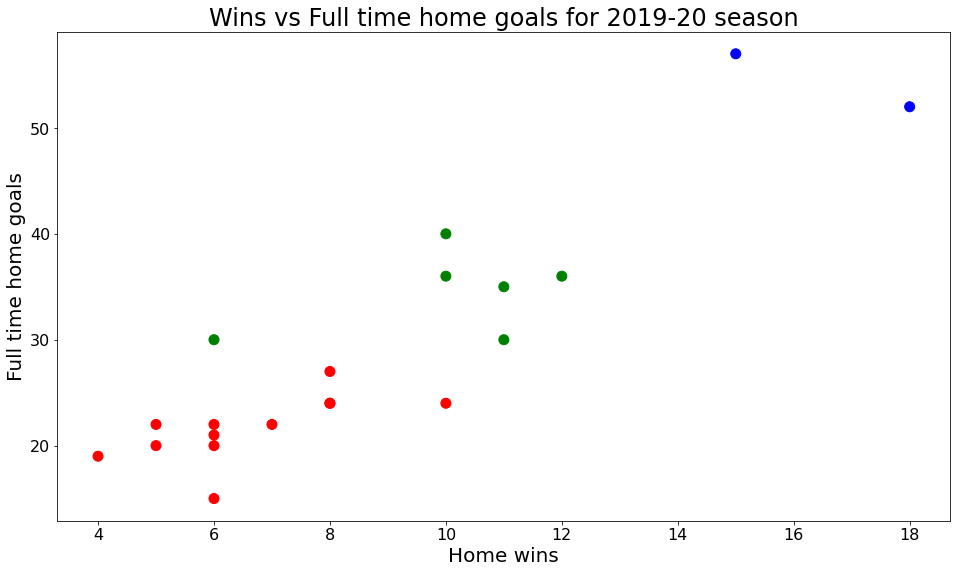

,Cluster 1 (red),Cluster 2 (blue),Cluster 3 (green)
0,Aston Villa,Liverpool,Arsenal
1,Bournemouth,Man City,Chelsea
2,Brighton,,Leicester
3,Burnley,,Man United
4,Crystal Palace,,Tottenham
5,Everton,,West Ham
6,Newcastle,,
7,Norwich,,
8,Sheffield United,,
9,Southampton,,


Winner of 2018-19 season: Man City
Winner of 2019-20 season: Liverpool


In [129]:
from sklearn.cluster import KMeans

# random state for consistent results
clusters = KMeans(3, random_state=0).fit_predict(latest_season[['HW', 'FTHG']])

# dictionary to create table of team in a cluster
cluster_data = { 'Cluster 1 (red)': [], 'Cluster 2 (blue)': [], 'Cluster 3 (green)': []}


cluster_colour = ['red', 'blue', 'green']
plot_colour = []

# get cluster data and set colours for each cluster for plot
for i, cluster in enumerate(clusters):
    team = latest_season['FTHG'].index.values[i]
    colour = cluster_colour[cluster]
    cluster_data['Cluster {} ({})'.format(cluster + 1, colour)].append(team)
    plot_colour.append(colour)

plt.figure(figsize=(16, 9))
plt.scatter(latest_season['HW'], latest_season['FTHG'], c=plot_colour, s=100)
plt.title('Wins vs Full time home goals for 2019-20 season', fontsize=24)
plt.xlabel('Home wins', fontsize=20)
plt.ylabel('Full time home goals', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Display table of classifications and winner from current and last season
display(pd.DataFrame.from_dict(cluster_data, orient='index').transpose().fillna(' '))
print('Winner of 2018-19 season: {}'.format(winners['2018-19']))
print('Winner of 2019-20 season: {}'.format(winners['2019-20']))

From the chart and table, we can see that there seem to be three distinct sets of teams—low performers, high performers and teams that perform exceptionally well. The winners for the year, Liverpool, are far away from most of the Manchester City teams, the previous year's runner ups.

It would be interesting to combine data to classify the teams based on other metrics. For example, the number of corner kicks vs goals. 


## Conclusion

Home teams have an advantage, both in performance and potential bias from referees favouring home teams. The teams that perform the worst at home seem to be the most consistent at performing poorly. Performing well on home ground is essential for success as most teams have an advantage of taking shots, corners and goals. The reduced moral from home losses could result in worse performance away.

## Future work

The comparison of home versus away performance is just one of the many features that can be used to compare. Utilising them to predict future winners would be an exciting problem to work as it has already been seen that winners are top performers year on year and that drastic performance changes are rare.
